# Desafíos SUNAI

In [1]:
import pandas as pd

## En este desafío estimaremos la desviación de precios del sistema eléctrico chileno. Específicamente, estimaremos la desviación de los costos marginales en distintos nodos del sistema, entendiendo qué variables son las que más afectan su comportamiento y cómo esto podría ser útil para la eficiencia del sistema. Para ello, hemos construido un dataset usando datos públicos y reales del sistema eléctrico de Chile.


### Barra Principal: Es un tramo de conductores aislados, donde convergen líneas de transmisión, alimentación a bancos de autotransformadores y transformadores de poder que retiran o inyectan energía a la barra, permitiendo el traspaso de flujos de potencias entre las líneas.

### Merge del costos marginal real con el costo marginal programado a nivel de barra.

## Análisis exploratorio


In [2]:
CMR=pd.read_csv("CMR_muestra.csv")
CMR.head()

,Unnamed: 0,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_en_dolares,costo_en_pesos,nombre
0,3453873,BA07R002SE023R002,BA02T002SE032T002,2019-03-07,20,55.15,36.26057,BA S/E LO BOZA 23KV BP3
1,3708820,BA01T005SE088T005,BA02T002SE032T002,2019-05-21,21,60.28,41.99165,BA S/E PENCO 15KV
2,4128702,BA02T005SE203T005,BA02T002SE032T002,2019-01-22,23,133.84,89.68618,BA S/E LA VEGA 66KV
3,1407981,BA03T005SE046T005,BA02T002SE032T002,2019-06-24,8,53.56,36.64522,BA S/E LINARES 66KV
4,3924174,BA03R002SE087R002,BA02T002SE032T002,2019-06-26,22,60.42,41.22517,BA S/E BICENTENARIO 13.2KV BP1


In [3]:
CMR.drop(['Unnamed: 0'], axis=1)

,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_en_dolares,costo_en_pesos,nombre
0,BA07R002SE023R002,BA02T002SE032T002,2019-03-07,20,55.15,36.26057,BA S/E LO BOZA 23KV BP3
1,BA01T005SE088T005,BA02T002SE032T002,2019-05-21,21,60.28,41.99165,BA S/E PENCO 15KV
2,BA02T005SE203T005,BA02T002SE032T002,2019-01-22,23,133.84,89.68618,BA S/E LA VEGA 66KV
3,BA03T005SE046T005,BA02T002SE032T002,2019-06-24,8,53.56,36.64522,BA S/E LINARES 66KV
4,BA03R002SE087R002,BA02T002SE032T002,2019-06-26,22,60.42,41.22517,BA S/E BICENTENARIO 13.2KV BP1
...,...,...,...,...,...,...,...
215493,BA01L025SE001L025,BA02T002SE032T002,2019-02-27,9,56.43,36.63548,BA S/E PUNTA PEUCO HBP
215494,BA01G004SE002L020,BA02T002SE032T002,2019-06-04,5,48.42,34.36852,BA S/E MINERO 220KV B1
215495,BA01G004SE028T011,BA02T002SE032T002,2019-03-11,5,50.73,33.59290,BA S/E CERRO CALERA 110KV
215496,BA03T002SE002T002,BA02T002SE032T002,2019-03-04,9,54.52,35.53559,BA S/E ALTO JAHUEL 154KV


In [6]:
CMR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215498 entries, 0 to 215497
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     215498 non-null  int64  
 1   barra_mnemotecnico             215498 non-null  object 
 2   barra_referencia_mnemotecnico  215498 non-null  object 
 3   fecha                          215498 non-null  object 
 4   hora                           215498 non-null  int64  
 5   costo_en_dolares               215498 non-null  float64
 6   costo_en_pesos                 215498 non-null  float64
 7   nombre                         215498 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 13.2+ MB


In [32]:
CMR["barra_mnemotecnico"].value_counts()

BA01T002SE100T002    262
BA01T005SE178T005    260
BA34L118SE066L118    259
BA01T005SE073T005    259
BA02T002SE030T002    257
                    ... 
BA42G216SE187G216     64
BA56T005SE276T005     44
BA65T005SE277T005     37
BA87T005SE275T005     33
BA01G460SE002G460     25
Name: barra_mnemotecnico, Length: 1020, dtype: int64

In [31]:
cant_barras_CMR=len(CMR["barra_mnemotecnico"].value_counts())
print (cant_barras_CMR)

1020


### Cantidad de barras en base real: 1020

In [7]:
CMP=pd.read_csv("CMP_muestra.csv")
CMP.head()

,Unnamed: 0,mnemotecnico_barra,nombre_barra,fecha,hora,costo
0,253016,BA04T005SE054T005,BA S/E SAN FERNANDO 154KV B2,2019-02-14,9,56.920873
1,951685,BA97G216SE106G216,BA S/E MEJILLONES 220KV,2019-06-22,19,133.405290
2,74991,BA22G232SE002G232,BA S/E CONCHI 220KV - BP,2019-01-14,16,48.147882
3,746881,BA36T027SE067G216,BA S/E EL COBRE (EDELNOR) 220KV - BP1,2019-05-13,7,70.340579
4,883404,BA05T005SE151T005,BA S/E NUEVA MALLOA 154KV,2019-06-06,18,52.383229


In [8]:
CMP.drop(['Unnamed: 0'], axis=1)

,mnemotecnico_barra,nombre_barra,fecha,hora,costo
0,BA04T005SE054T005,BA S/E SAN FERNANDO 154KV B2,2019-02-14,9,56.920873
1,BA97G216SE106G216,BA S/E MEJILLONES 220KV,2019-06-22,19,133.405290
2,BA22G232SE002G232,BA S/E CONCHI 220KV - BP,2019-01-14,16,48.147882
3,BA36T027SE067G216,BA S/E EL COBRE (EDELNOR) 220KV - BP1,2019-05-13,7,70.340579
4,BA05T005SE151T005,BA S/E NUEVA MALLOA 154KV,2019-06-06,18,52.383229
...,...,...,...,...,...
59601,BA09T002SE058T002,BA S/E LAGUNILLAS 220KV SECCIÓN A-1,2019-05-09,8,62.366861
59602,BA18L120SE061L120,BA S/E COLOSO 220KV - BP1,2019-01-10,18,45.592352
59603,BA01T002SE055T002,BA S/E CIPRESES 154KV B1,2019-06-16,4,52.093103
59604,BA01R002SE050R002,BA S/E CERRO NAVIA (CHILECTRA) 110KV B1,2019-03-12,23,100.039557


In [9]:
CMP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59606 entries, 0 to 59605
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          59606 non-null  int64  
 1   mnemotecnico_barra  59606 non-null  object 
 2   nombre_barra        59606 non-null  object 
 3   fecha               59606 non-null  object 
 4   hora                59606 non-null  int64  
 5   costo               59606 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 2.7+ MB


In [28]:
cant_barras_CMP= len(CMP["barra_mnemotecnico"].value_counts())
print (cant_barras_CMP)

239


### Cantidad de barras en base programada: 239

In [10]:
CMP=CMP.rename(columns={"mnemotecnico_barra":"barra_mnemotecnico", "nombre_barra":"nombre"})
CMP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59606 entries, 0 to 59605
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          59606 non-null  int64  
 1   barra_mnemotecnico  59606 non-null  object 
 2   nombre              59606 non-null  object 
 3   fecha               59606 non-null  object 
 4   hora                59606 non-null  int64  
 5   costo               59606 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 2.7+ MB


In [11]:
costo_marginal = pd.merge(CMR, CMP,  how='inner', on=["barra_mnemotecnico", "fecha", "hora"])
costo_marginal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2235 entries, 0 to 2234
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0_x                   2235 non-null   int64  
 1   barra_mnemotecnico             2235 non-null   object 
 2   barra_referencia_mnemotecnico  2235 non-null   object 
 3   fecha                          2235 non-null   object 
 4   hora                           2235 non-null   int64  
 5   costo_en_dolares               2235 non-null   float64
 6   costo_en_pesos                 2235 non-null   float64
 7   nombre_x                       2235 non-null   object 
 8   Unnamed: 0_y                   2235 non-null   int64  
 9   nombre_y                       2235 non-null   object 
 10  costo                          2235 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 209.5+ KB


In [12]:
costo_marginal.head()

,Unnamed: 0_x,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_en_dolares,costo_en_pesos,nombre_x,Unnamed: 0_y,nombre_y,costo
0,202870,BA01T002SE058T002,BA02T002SE032T002,2019-02-15,2,68.40,45.25344,BA S/E LAGUNILLAS 154KV BA-A,256705,BA S/E LAGUNILLAS 154KV BA-A,60.200724
1,684548,BA01R003SE003R003,BA02T002SE032T002,2019-06-18,4,49.50,34.58664,BA S/E ALTO MELIPILLA BARRA 220KV N° 1,932278,BA S/E ALTO MELIPILLA BARRA 220KV N° 1,62.386968
2,2428426,BA01G010SE008G010,BA02T002SE032T002,2019-04-28,14,51.51,34.83158,BA S/E VENTANAS HBP1-A,665696,BA S/E VENTANAS HBP1-A,50.381798
3,647198,BA55G216SE123G216,BA02T002SE032T002,2019-05-12,4,46.73,32.07687,BA S/E POZO ALMONTE 66KV,742846,BA S/E POZO ALMONTE 66KV,48.773817
4,3903787,BA01R002SE015R002,BA02T002SE032T002,2019-06-06,22,51.89,36.15591,BA S/E FLORIDA 110KV BP1,882496,BA S/E FLORIDA 110KV BP1,51.511666


In [48]:
costo_marginal.groupby(['barra_mnemotecnico']).costo_en_dolares.agg([len, min, max])

,len,min,max
barra_mnemotecnico,,,
BA01G004SE001T011,13.0,48.20,143.01
BA01G004SE009G004,11.0,47.73,137.38
BA01G004SE017G004,15.0,46.83,116.95
BA01G004SE035G004,8.0,50.45,165.21
BA01G004SE036G004,9.0,46.13,127.16
...,...,...,...
BA94G216SE031G216,7.0,39.34,54.56
BA95L128SE193L128,7.0,38.23,62.28
BA96L109SE032L109,7.0,0.00,70.05


In [49]:
costo_marginal.groupby(['barra_mnemotecnico']).costo.agg([len, min, max])

,len,min,max
barra_mnemotecnico,,,
BA01G004SE001T011,13.0,49.328085,87.781346
BA01G004SE009G004,11.0,48.397716,81.358816
BA01G004SE017G004,15.0,45.865303,94.805798
BA01G004SE035G004,8.0,53.935322,111.891605
BA01G004SE036G004,9.0,43.723731,91.580721
...,...,...,...
BA94G216SE031G216,7.0,41.992735,90.665862
BA95L128SE193L128,7.0,39.804047,83.670455
BA96L109SE032L109,7.0,46.373159,120.155151


In [36]:
corr_mat = costo_marginal.corr()
corr_mat.loc["costo_en_dolares", "costo"]

0.43515566633079233

C:\Users\Windows\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='costo_en_dolares'>

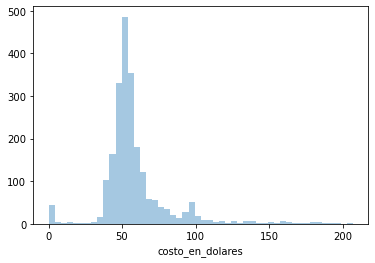

In [39]:
import seaborn as sns
sns.distplot(a=costo_marginal["costo_en_dolares"], kde=False)

<AxesSubplot:xlabel='costo'>

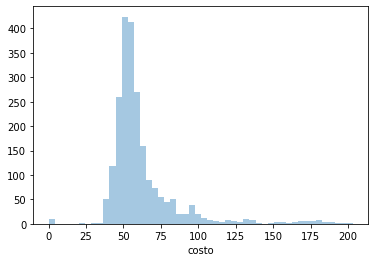

In [40]:
sns.distplot(a=costo_marginal["costo"], kde=False)

In [43]:
from scipy import stats
columnas_numericas = costo_marginal.select_dtypes(['int', 'float']).columns
for num_col in columnas_numericas:
    _, pval = stats.normaltest(costo_marginal[num_col])
    if(pval < 0.05):
        print("Columna {} no sigue una distribución normal".format(num_col))

Columna costo_en_dolares no sigue una distribución normal
Columna costo_en_pesos no sigue una distribución normal
Columna costo no sigue una distribución normal


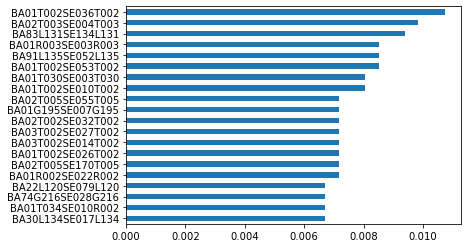

In [45]:
import matplotlib.pyplot as plt
def distribucion_variable_categorica(col):
    costo_marginal[col].value_counts(ascending=True,normalize=True).tail(20).plot.barh()
    plt.show()
distribucion_variable_categorica('barra_mnemotecnico')

In [30]:
cant_barras_CostoMarginal= len(costo_marginal["barra_mnemotecnico"].value_counts())
print (cant_barras_CostoMarginal)

220


### Cantidad de barras en base creada a partir del merge: 220

In [33]:
Porcentaje_barras_prog= cant_barras_CMP/cant_barras_CMR *100
print(Porcentaje_barras_prog)

23.431372549019606


In [50]:
Porcentaje_barras_prog_CostoMarginal= cant_barras_CostoMarginal/cant_barras_CMR *100
print(Porcentaje_barras_prog_CostoMarginal)

21.568627450980394


### El porcentaje es 23,43137% para las barras programadas sobre las barras reales y 21,56863% para las calculadas a partir de la tabla Costo_marginal

## El análisis exploratorio permite visualizar que las variables numéricas (costo, costo en dólares y en pesos) no siguen una distribución normal. Además, las barras se pueden ver que los regisitros de las barras no son uniformes, es decir, hay barras que tienen más mediciones y registros de costos que otras (algunas están en el 0,007% de todas las mediciones mientras que otras llegan al 0,01% o más). Por último, hay una correlación positiva débil entre las variables costo y costo en dólares (coeficiente=0,43)

# Construir nuevas variables para la base creada anteriormente y ver cómo cambia a través del tiempo.

In [52]:
import numpy as np
costo_marginal["desviacion"] = costo_marginal["costo_en_dolares"]-costo_marginal["costo"]
costo_marginal["desviacion_pct"] = (costo_marginal["costo"]/costo_marginal["costo_en_dolares"]) * 100

In [62]:
costo_marginal["desviacion_cat"] = np.where(abs(costo_marginal["desviacion_pct"])>15, 1, 0)

In [63]:
costo_marginal.head()

,Unnamed: 0_x,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_en_dolares,costo_en_pesos,nombre_x,Unnamed: 0_y,nombre_y,costo,desviacion,desviacion_pct,desviacion_cat
0,202870,BA01T002SE058T002,BA02T002SE032T002,2019-02-15,2,68.40,45.25344,BA S/E LAGUNILLAS 154KV BA-A,256705,BA S/E LAGUNILLAS 154KV BA-A,60.200724,8.199276,88.012755,1
1,684548,BA01R003SE003R003,BA02T002SE032T002,2019-06-18,4,49.50,34.58664,BA S/E ALTO MELIPILLA BARRA 220KV N° 1,932278,BA S/E ALTO MELIPILLA BARRA 220KV N° 1,62.386968,-12.886968,126.034278,1
2,2428426,BA01G010SE008G010,BA02T002SE032T002,2019-04-28,14,51.51,34.83158,BA S/E VENTANAS HBP1-A,665696,BA S/E VENTANAS HBP1-A,50.381798,1.128202,97.809743,1
3,647198,BA55G216SE123G216,BA02T002SE032T002,2019-05-12,4,46.73,32.07687,BA S/E POZO ALMONTE 66KV,742846,BA S/E POZO ALMONTE 66KV,48.773817,-2.043817,104.373673,1
4,3903787,BA01R002SE015R002,BA02T002SE032T002,2019-06-06,22,51.89,36.15591,BA S/E FLORIDA 110KV BP1,882496,BA S/E FLORIDA 110KV BP1,51.511666,0.378334,99.270892,1


In [64]:
costo_marginal["desviacion_cat"].value_counts()

1    2232
0       3
Name: desviacion_cat, dtype: int64

In [65]:
costo_marginal.loc[(costo_marginal.desviacion_cat == 0)]

,Unnamed: 0_x,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_en_dolares,costo_en_pesos,nombre_x,Unnamed: 0_y,nombre_y,costo,desviacion,desviacion_pct,desviacion_cat
313,3032080,BA56G216SE023G216,BA02T002SE032T002,2019-01-02,17,49.72,34.58971,BA S/E ARICA 66KV-BP,6208,BA S/E ARICA 66KV-BP,0.000000,49.720000,0.000000,0
819,3036755,BA89G216SE030G216,BA02T002SE032T002,2019-01-07,17,48.02,33.50067,BA S/E CENTRAL CHAPIQUIÑA 66KV-BP,34984,BA S/E CENTRAL CHAPIQUIÑA 66KV-BP,0.000000,48.020000,0.000000,0
2077,2581244,BA21L120SE114L120,BA02T002SE032T002,2019-04-01,15,40.43,27.53647,BA S/E O'HIGGINS 220KV - BP1,511286,BA S/E O'HIGGINS 220KV - BP1,0.045201,40.384799,0.111801,0


### La variable desviacion_cat tiene casi todas las entradas valor 1. Esto indica que, salvo 3 registros, no cambia a través del tiempo.

# Crear una función que permita visualizar el costo de una barra en un período de tiempo específico

In [117]:
from datetime import datetime, timedelta
costo_marginal['fecha_formato'] = pd.to_datetime(costo_marginal['fecha'])
costo_marginal.head()

,Unnamed: 0_x,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_en_dolares,costo_en_pesos,nombre_x,Unnamed: 0_y,nombre_y,costo,desviacion,desviacion_pct,desviacion_cat,fecha_formato
0,202870,BA01T002SE058T002,BA02T002SE032T002,2019-02-15,2,68.40,45.25344,BA S/E LAGUNILLAS 154KV BA-A,256705,BA S/E LAGUNILLAS 154KV BA-A,60.200724,8.199276,88.012755,1,2019-02-15
1,684548,BA01R003SE003R003,BA02T002SE032T002,2019-06-18,4,49.50,34.58664,BA S/E ALTO MELIPILLA BARRA 220KV N° 1,932278,BA S/E ALTO MELIPILLA BARRA 220KV N° 1,62.386968,-12.886968,126.034278,1,2019-06-18
2,2428426,BA01G010SE008G010,BA02T002SE032T002,2019-04-28,14,51.51,34.83158,BA S/E VENTANAS HBP1-A,665696,BA S/E VENTANAS HBP1-A,50.381798,1.128202,97.809743,1,2019-04-28
3,647198,BA55G216SE123G216,BA02T002SE032T002,2019-05-12,4,46.73,32.07687,BA S/E POZO ALMONTE 66KV,742846,BA S/E POZO ALMONTE 66KV,48.773817,-2.043817,104.373673,1,2019-05-12
4,3903787,BA01R002SE015R002,BA02T002SE032T002,2019-06-06,22,51.89,36.15591,BA S/E FLORIDA 110KV BP1,882496,BA S/E FLORIDA 110KV BP1,51.511666,0.378334,99.270892,1,2019-06-06


In [166]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#fecha_final=datetime(2019, 12, 31)

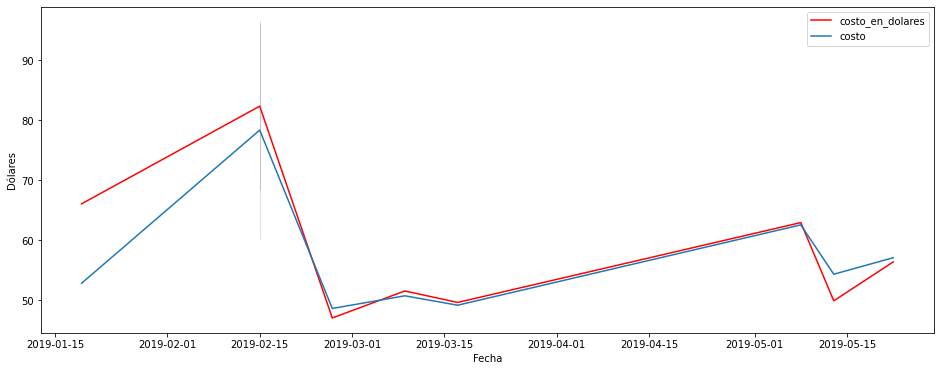

In [178]:
def time_plot_costo_barra(codigo_barra, fecha_inicial, fecha_final):
    tp = costo_marginal.loc[(costo_marginal["barra_mnemotecnico"] == codigo_barra) & 
                            (costo_marginal["fecha_formato"]>fecha_inicial) & (costo_marginal["fecha_formato"]<fecha_final)]
    tp2 = costo_marginal.loc[(costo_marginal["barra_mnemotecnico"] == codigo_barra) & 
                            (costo_marginal["fecha_formato"]>fecha_inicial) & (costo_marginal["fecha_formato"]<fecha_final)]
    df_tp=pd.DataFrame(tp)
    df_tp2=pd.DataFrame(tp2)
    #plt.plot('fecha_formato', 'costo_en_dolares', data=df_tp, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
    #plt.plot('fecha_formato', 'costo', data=df_tp, marker='', color='olive', linewidth=2)
    #plt.legend()
    #plt.show()
    plt.figure(figsize=(16,6))
    sns.lineplot(x="fecha_formato",y="costo_en_dolares", data=df_tp, color="red")
    sns.lineplot(x="fecha_formato",y="costo", data=df_tp2)
    plt.xlabel("Fecha")
    plt.ylabel("Dólares")
    plt.legend(labels=["costo_en_dolares", "costo"])

from datetime import datetime
fecha_inicial= datetime (2019,1,1)
fecha_final=datetime (2019,5,31)

time_plot_costo_barra("BA01T002SE058T002", fecha_inicial, fecha_final)

### El costo en dolares real y el programado tienen valores similares. Es decir, lo programado ajusta al costo real (salvo para los primeros 2 puntos).

# Carga de una nueva base de datos para predicción. Análisis de la base de datos y visualización de datos de energía para una estación dada en una fecha específica

In [69]:
df_prediccion=pd.read_csv("base_para_prediccion.csv")
df_prediccion.head()

,nemotecnico_se,fecha,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,cmg_desv,cmg_desv_pct,n_barras,demanda_mwh,cap_inst_mw
0,SE031G216,2019-01-04 00:00:00 UTC,1,NaN,NaN,NaN,NaN,0.0,56.2,55.627852,0.57,1.02,2,1210767,13.20785
1,SE031G216,2019-01-04 00:00:00 UTC,2,NaN,NaN,NaN,NaN,0.0,56.2,55.376645,0.82,1.48,2,113232,13.20785
2,SE031G216,2019-01-04 00:00:00 UTC,3,NaN,NaN,NaN,NaN,0.0,56.2,59.531891,-3.33,-5.59,2,1089415,13.20785
3,SE031G216,2019-01-04 00:00:00 UTC,4,NaN,NaN,NaN,NaN,0.0,56.2,174.378923,-118.18,-67.77,2,1096867,13.20785
4,SE031G216,2019-01-04 00:00:00 UTC,5,NaN,NaN,NaN,NaN,0.0,56.2,172.820310,-116.62,-67.48,2,1071851,13.20785


In [70]:
df_prediccion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112779 entries, 0 to 112778
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   nemotecnico_se            112779 non-null  object 
 1   fecha                     112779 non-null  object 
 2   hora                      112779 non-null  int64  
 3   gen_eolica_total_mwh      0 non-null       float64
 4   gen_geotermica_total_mwh  0 non-null       float64
 5   gen_hidraulica_total_mwh  34184 non-null   float64
 6   gen_solar_total_mwh       41818 non-null   float64
 7   gen_termica_total_mwh     61863 non-null   float64
 8   cmg_real                  112779 non-null  float64
 9   cmg_prog                  112779 non-null  float64
 10  cmg_desv                  112779 non-null  float64
 11  cmg_desv_pct              112779 non-null  float64
 12  n_barras                  112779 non-null  int64  
 13  demanda_mwh               112779 non-null  i

### Es una tabla que contiene 112779 registros. Hay 13 variables numéricas de las cuales 3 son integer y el resto float. La variables categórica es la nemotecnico_se y la fecha está como tipo objeto (string). De las columnas, gen_eolica_total y gen_geotermica_total contienen todos datos nulos, mientras que las otras columnas (gen_solar_total, gen_hidraulica_total y gen_termica_total) contienen un gran porcentaje de datos nulos.

In [74]:
from datetime import datetime, timedelta
df_prediccion['fecha_formato'] = pd.to_datetime(df_prediccion['fecha'])
df_prediccion.head()

,nemotecnico_se,fecha,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,cmg_desv,cmg_desv_pct,n_barras,demanda_mwh,cap_inst_mw,fecha_formato
0,SE031G216,2019-01-04 00:00:00+00:00,1,NaN,NaN,NaN,NaN,0.0,56.2,55.627852,0.57,1.02,2,1210767,13.20785,2019-01-04 00:00:00+00:00
1,SE031G216,2019-01-04 00:00:00+00:00,2,NaN,NaN,NaN,NaN,0.0,56.2,55.376645,0.82,1.48,2,113232,13.20785,2019-01-04 00:00:00+00:00
2,SE031G216,2019-01-04 00:00:00+00:00,3,NaN,NaN,NaN,NaN,0.0,56.2,59.531891,-3.33,-5.59,2,1089415,13.20785,2019-01-04 00:00:00+00:00
3,SE031G216,2019-01-04 00:00:00+00:00,4,NaN,NaN,NaN,NaN,0.0,56.2,174.378923,-118.18,-67.77,2,1096867,13.20785,2019-01-04 00:00:00+00:00
4,SE031G216,2019-01-04 00:00:00+00:00,5,NaN,NaN,NaN,NaN,0.0,56.2,172.820310,-116.62,-67.48,2,1071851,13.20785,2019-01-04 00:00:00+00:00


In [92]:
df_prediccion['año'] = df_prediccion['fecha'].dt.year 
df_prediccion['mes'] = df_prediccion['fecha'].dt.month
df_prediccion['semana'] = df_prediccion['fecha'].dt.isocalendar().week 
df_prediccion['dia_cal'] = df_prediccion['fecha'].dt.day
df_prediccion['dia_sem'] = df_prediccion['fecha'].dt.day_name()
df_prediccion["fin_de_semana"]= ["si" if s =="Sunday" or s== "Saturday" else "no" for s in df_prediccion['dia_sem']]
#df_prediccion["fin_de_semana"] = (df_prediccion["dia_sem"]).apply(lambda x: df_prediccion["dia_sem"]
#                                                                  if (x=="Saturday" | x=="Sunday"), "si", "no")
df_prediccion.tail()

,nemotecnico_se,fecha,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,...,n_barras,demanda_mwh,cap_inst_mw,fecha_formato,año,mes,semana,dia_cal,dia_sem,fin_de_semana
112774,SE170T005,2019-06-30 00:00:00+00:00,20,NaN,NaN,NaN,NaN,0.775,44.1,41.362200,...,3,9334786,30.14,2019-06-30 00:00:00+00:00,2019,6,26,30,Sunday,si
112775,SE170T005,2019-06-30 00:00:00+00:00,21,NaN,NaN,NaN,NaN,0.925,44.1,42.217780,...,3,9353773,30.14,2019-06-30 00:00:00+00:00,2019,6,26,30,Sunday,si
112776,SE170T005,2019-06-30 00:00:00+00:00,22,NaN,NaN,NaN,NaN,0.975,44.1,42.197451,...,3,9114529,30.14,2019-06-30 00:00:00+00:00,2019,6,26,30,Sunday,si
112777,SE170T005,2019-06-30 00:00:00+00:00,23,NaN,NaN,NaN,NaN,0.750,44.1,41.473556,...,3,8118728,30.14,2019-06-30 00:00:00+00:00,2019,6,26,30,Sunday,si
112778,SE170T005,2019-06-30 00:00:00+00:00,24,NaN,NaN,NaN,NaN,0.700,44.1,36.197329,...,3,6888256,30.14,2019-06-30 00:00:00+00:00,2019,6,26,30,Sunday,si


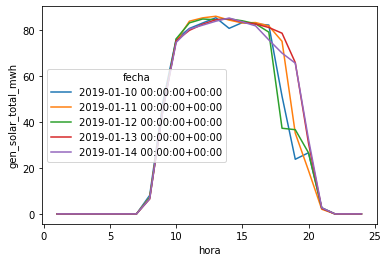

In [106]:
def serie_tiempo_diarias (codigo, variable_num, lista_fechas):
    r = df_prediccion.loc[(df_prediccion["nemotecnico_se"] == codigo) & (df_prediccion.fecha.isin(lista_fechas))]
    df_r=pd.DataFrame(r)
    sns.lineplot(x="hora",y=variable_num,data=df_r, hue="fecha")

lista_fechas=[]
lista_fechas.append("2019-01-10 00:00:00+00:00")
lista_fechas.append("2019-01-11 00:00:00+00:00")
lista_fechas.append("2019-01-12 00:00:00+00:00")
lista_fechas.append("2019-01-13 00:00:00+00:00")
lista_fechas.append("2019-01-14 00:00:00+00:00")
serie_tiempo_diarias ("SE005T002", "gen_solar_total_mwh", lista_fechas)


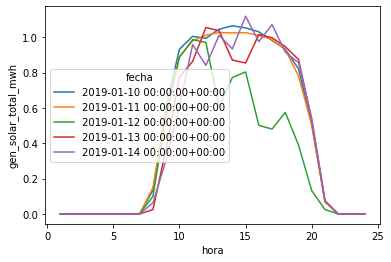

In [107]:
serie_tiempo_diarias ("SE127T005", "gen_solar_total_mwh", lista_fechas)

### Para la subestación SE005T002, la generación total medida comienza a las 8hs, tiene sus máximos entre las 11hs y las 17hs, y luego baja hasta 0 a las 20hs. Los niveles máximos medidos son alrededor de 80 mwh. Por otro lado, la subestación SE127T005 también empieza a las 8hs con la generación de energía pero los valores fluctúan durante las 10hs hasta las 19hs, momento en el que bajan llegando a 0 a las 21hs. También se observan que los valores alcanzados son mucho menores que la otra subestación (máximo alrededor de 1 mwh). Hay un día particular (2019-01-12) que la producción de energía bajó a las 12hs y desde ahí siguió bajando con algunos picos de subida hasta llegar a 0 a las 21hs. Por lo tanto, la generación de energía en la subestación SE005T002 es mucho mayor que en la otra y con valores más estables.

In [132]:
lista_fechas.clear()

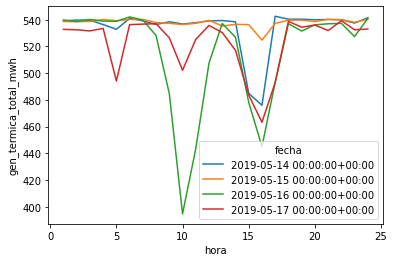

In [133]:
lista_fechas.append("2019-05-14 00:00:00+00:00")
lista_fechas.append("2019-05-15 00:00:00+00:00")
lista_fechas.append("2019-05-16 00:00:00+00:00")
lista_fechas.append("2019-05-17 00:00:00+00:00")
serie_tiempo_diarias ("SE020G213", "gen_termica_total_mwh", lista_fechas)

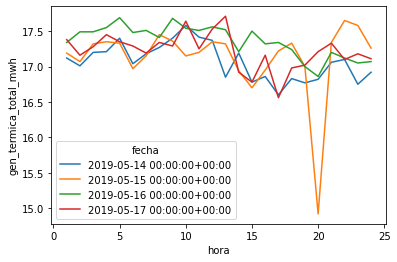

In [134]:
serie_tiempo_diarias ("SE106G216", "gen_termica_total_mwh", lista_fechas)

### La subestación SE020G213 comienza la generación de energía térmica a la hora 1 a niveles de 540 mwh y tiene valles a la hora 16 en todos los días. Además, el 17 de mayo hay un valle muy pronunciado a la hora 10 (llegó a 400 mwh, bajó un 25%) y el día 16 de mayo hay 2 valles: hora 5 y hora 10. La subestación SE106G216 tiene registros fluctuantes durante todo el día cuyos valores oscilan entre 16,5 y 17,5 mwh (salvo el 15 de mayo que bajó hasta 15 mwh a las 20hs). Para concluir, la subestación SE020G213 genera valores de energía mucho mayores y estables que la otra subestación.